In [1]:
import numpy as np
import ctypes

In [2]:
# Number of datapoints to check against
n = 10 

# Interfacing Darknet with other Python image types.

### Darknet image C structure datatype

Defined in ```structs.py```

In [3]:
from pydarknet.libdarknet.structs import Image
import pydarknet

Load image with ```load_image_color``` in the shared library.

```Libdarknet``` paths are always relative to the ```darknet``` directory. Because reasons.

In [4]:
lib = pydarknet.libdarknet.Libdarknet()
img = lib.load_image_color("data/dog.jpg")
img

Image<768x576x3>

In [5]:
len(img)

1327104

In [6]:
assert len(img)==img.h*img.w*img.c

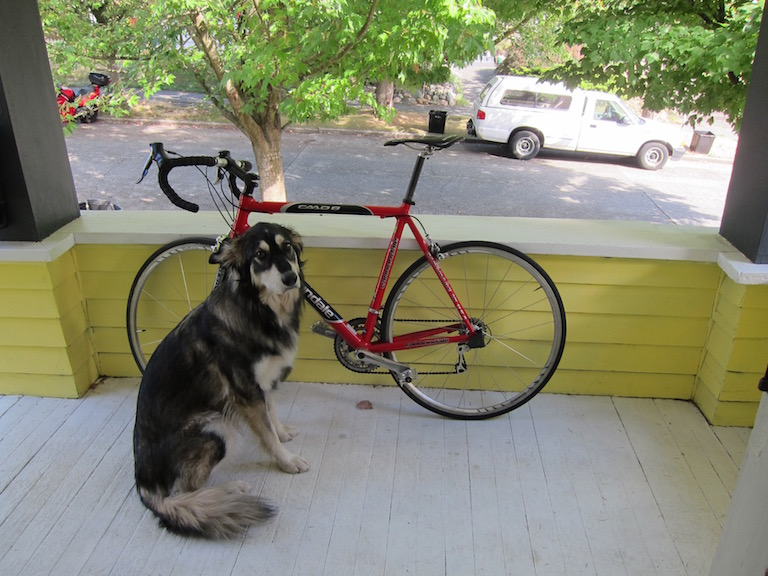

In [7]:
img.asimage()

In [9]:
img.asarray()[0,0,:]

array([57, 58, 50], dtype=uint8)

In [ ]:
self=img

In [ ]:
np.multiply(self.float[0:len(self)], 255).astype(dtype=np.uint8)

In [ ]:
len(img)

Image attributes:

In [ ]:
img.h # height

In [ ]:
img.w # width

In [ ]:
img.c # colors

In [ ]:
img.asarray()

Single pixel color information, as used by darknet and stored in Image datatype:

In [ ]:
img.float[0]

Converted to uint8:

In [ ]:
np.uint8(img.float[0]*255)

First ```n``` data points as stored in C, as uint8s

In [ ]:
check_=np.multiply(img.float[0:n], 255).astype(np.uint8)
check_

In [ ]:
check2_=np.multiply(img.float[0:img.h*img.w*img.c], 255).astype(np.uint8)

Get the absolute path to the dog picture for other libraries.

In [ ]:
dog_path = lib.root+"/data/dog.jpg"

## Pillow

https://python-pillow.org/

> ... the friendly PIL fork. PIL is the Python Imaging Library.

In [ ]:
import PIL

In [ ]:
img = PIL.Image.open(dog_path)
img

In [ ]:
type(img)

In [ ]:
img.size # Notice size is width x height.

In [ ]:
w, h = img.size

Convert to numpy array:

In [ ]:
img_ = np.asarray(img, dtype=np.uint8)
img_

In [ ]:
img_.shape # Notice the numpmy array is height x width

In [ ]:
h, w, c = img_.shape

All 3 colors of the first pixel in RGB:

In [ ]:
img_[0,0,:]

First N data points as they will be stored in the C array.

In [ ]:
check = img_[0, 0:n, 0]
check

Compare against the darknet loaded image & values:

In [ ]:
assert np.allclose(check_, check)

In [ ]:
type(img_)

Reshape the matrix for storage in the Image structure:

In [ ]:
img2 = img_.transpose(2, 0, 1)
img2

In [ ]:
img2.shape

All 3 colors of the first pixel in RGB, after transformation.

In [ ]:
img2[:,0,0]

Compare against the darknet loaded image & values:

In [ ]:
check = img2[0,0,0:n]
check

In [ ]:
assert np.allclose(check_, check)

In [ ]:
array = img2
# 
colors = array.shape[0]
height = array.shape[1]
width  = array.shape[2]

array.shape

In [ ]:
# Scale the uint8s to floats and flatten the array
array_ = (array.astype(np.float) / 255.0).flatten()

In [ ]:
colors * height * width

In [ ]:
array_.shape # Flattened array has same number of data points.

In [ ]:
assert array_.shape[0]==colors * height * width

Convert the Python datatypes to an array of given datatype:

In [ ]:
def c_array(values, ctype=ctypes.c_float):
    arr = (ctype * len(values))()
    arr[:] = values
    return arr

In [ ]:
data = c_array(array_)
data

In [ ]:
data[0]

In [ ]:
np.uint8(data[0]*255)

Create an image datatype

In [ ]:
img2_ = Image(width, height, colors, data)

In [ ]:
img2_.

In [ ]:
img2_.c*img2_.h*img2_.w

In [ ]:
check = np.multiply(img2_.float[0:n], 255).astype(np.uint8)
check

In [ ]:
assert np.allclose(check_, check)

# imageio

https://imageio.github.io/

> Imageio is a Python library that provides an easy interface to read and write a wide range of image data, including animated images, video, volumetric data, and scientific formats. It is cross-platform, runs on Python 2.7 and 3.4+, and is easy to install.

In [ ]:
import imageio

In [ ]:
img = imageio.imread(dog_path)

In [ ]:
img[0,0,:]

In [ ]:
check = img[0, 0:n, 0]
check

In [ ]:
assert np.allclose(check_, check)

In [ ]:
img.shape

In [ ]:
type(img)

Reshape matrix:

In [ ]:
img2 = img.transpose(2, 0, 1)
img2

In [ ]:
img2.shape

In [ ]:
colors=img2.shape[0]
height=img2.shape[1]
width=img2.shape[2]

In [ ]:
img2[:,0,0]

In [ ]:
check = img2[0,0,0:n]
check

In [ ]:
assert np.allclose(check_, check)

In [ ]:
array=img2

In [ ]:
# Scale the uint8s to floats and flatten the array
array_ = (array.astype(np.float) / 255.0).flatten()

In [ ]:
array_

In [ ]:
img2_ = Image(width, height, colors, data)


## OpenCV

https://opencv.org/

> OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. Being a BSD-licensed product, OpenCV makes it easy for businesses to utilize and modify the code.

Getting OpenCV Python3 library:

1. ```sudo apt-get install python3-opencv``` on Ubuntu 18.04.
2. Compile opencv2 and install in your virtualenv.

In [ ]:
# For working in a virtual environment, add the system packages.
import sys
sys.path.append("/usr/lib/python3/dist-packages/")

In [ ]:
import cv2

In [ ]:
img = cv2.imread(dog_path)
img

In [ ]:
img.shape

In [ ]:
type(img)

In [ ]:
# OpenCV is BGR not RGB!
img[0,0,:]

In [ ]:
check = img[0, 0:n, 0]
check

This will fail!

In [ ]:
assert np.allclose(check, check_)

Convert BGR to RGB:

In [ ]:
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
img_.shape

In [ ]:
img_[0,0,:]

In [ ]:
check = img_[0, 0:n, 0]
check

In [ ]:
assert np.allclose(check, check_)

## From Image Struct to other Types:

In [ ]:
img = lib.load_image_color("data/dog.jpg")
img

In [ ]:
img.h

In [ ]:
img.w

In [ ]:
img.c

In [ ]:
data = img.float[0:img.h*img.w*img.c]

In [ ]:
type(data)

In [ ]:
data_ = np.asarray(data)

In [ ]:
data_.shape

In [ ]:
data__ = data_.reshape((img.c, img.h, img.w))

In [ ]:
data__.shape

In [ ]:
img=data__.transpose(1, 2, 0)
img.shape

In [ ]:
img_=np.multiply(img, 255.0).astype(dtype=np.uint8)

In [ ]:
img_[0,0,:]

In [ ]:
check = img_[0, 0:n, 0]
check

In [ ]:
assert np.allclose(check, check_)

In [ ]:
img = PIL.Image.fromarray(img_)
img

In [ ]:
img.size

In [ ]:
img_cv2 = cv2.cvtColor(img_, cv2.COLOR_RGB2BGR)